In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:\\Users\\GOURAV NEGI\\Downloads\\Admission_Prediction (2).csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()/df.shape[0]*(100)

Serial No.           0.0
GRE Score            3.0
TOEFL Score          2.0
University Rating    3.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [7]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


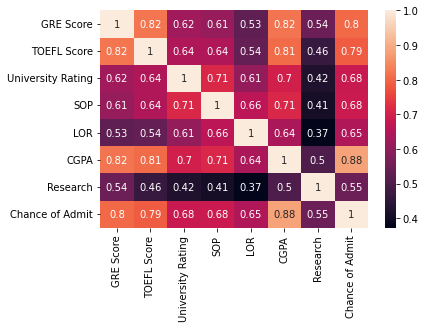

In [11]:
sns.heatmap(df.corr(),annot=True);

In [12]:
y = df['Chance of Admit']
x = df.drop(columns = ['Chance of Admit'])

In [13]:
scaler = StandardScaler()

In [14]:
x_scaled=scaler.fit_transform(x)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=500)

In [17]:
print(x_train.shape,y_train.shape)

(375, 7) (375,)


In [18]:
print(x_test.shape,y_test.shape)

(125, 7) (125,)


In [19]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
regression.score(x_train,y_train)# train pai jada lai ta hai

0.8316156934148047

In [25]:
import warnings 
warnings.filterwarnings('ignore')

Our r2 score is 84.15% for our training set.
Now let's check our model is overfitiing our data using regularization

In [21]:
 regression.score(x_test,y_test) # test pai kamm laita hai

0.7841595975822879

So it looks like our model r2 score is less on the test data.
Let's see if our model is overfitting our training data.

In [22]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lassCV = LassoCV(alphas = None,cv = 10, max_iter = 100000, normalize = True)
lassCV.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [ ]:
# CV is Cross validation

In [23]:
#best alpha parameter
alpha = lassCV.alpha_
alpha

6.506050064853207e-06

In [24]:
# now that we have best parameter, let's use Lasso  regression and see how well our data fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.506050064853207e-06)

In [ ]:
# # regularization tecknique overfiting ko kamm karne kai lia hoti hai
# best alpha nikalte hain 

In [ ]:
# lasso only for linear regression kai lia 


In [ ]:
# accuracy change hogye to overfitting hai 
#overfitting nahi ho to same aaiga 

In [26]:
lasso_reg.score(x_test,y_test)

0.7841629490929173

our r2_score for test data(75.34%)comes same as before using regularization.So,it is fair to say our OLS model did not overfit

In [30]:
#Using Ridge regression model 
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
# We  will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv= RidgeCV(alphas = alphas,cv=10,normalize = True)

ridgeCV.fit(x_train,y_train)


RidgeCV(alphas=array([5.96588792, 2.34070653, 4.54622005, 6.41807318, 9.75358481,
       1.46476551, 0.11507867, 5.06144728, 2.21965003, 2.34546143,
       4.35992089, 1.59446615, 5.88357812, 4.79447412, 5.09224429,
       6.78868177, 6.36127874, 8.57657858, 5.21824406, 1.74990354,
       2.08965749, 9.64488283, 2.15695008, 0.53180672, 9.79282089,
       1.23465708, 0.37648883, 5.91088978, 0.91626083, 6.87528837,
       0.33650137, 6.45111487, 4.91775287, 1.26112182, 8.37057885,
       1.33954141, 4.46275779, 3.35853441, 7.35297165, 1.70153356,
       7.9702009 , 5.16007797, 2.04178359, 5.00823467, 1.05895193,
       4.86412512, 8.59186195, 8.32458581, 0.06057117, 8.78395546]),
        cv=10, normalize=True)

In [ ]:
# coefficeint ka square hojayega
# OLS mean ordinary least square
# change hua to over fittning 
#then not 

In [29]:
ridgeCV.alpha_

0.06057116690142972

In [33]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.06057116690142972)

In [34]:
ridge_model.score(x_test,y_test)

0.7841883752150083